In [ ]:
# Импорт нужных библиотек, функция для построения графиков.
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

func_original = lambda x: (x ** 4 + x ** 2 + x + 1)

start = -2
end = 2
epsilon = 0.0001

# Построить график функции
def plot_func(start, end, method, epsilon=0.1, show_chart=False, func=func_original):
    plt.figure()
    plt.ion()

    cuts = 1000
    x_arr = np.linspace(start, end, cuts)

    plt.plot(x_arr, func(x_arr))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    method(start, end, epsilon, show_chart)
    plt.draw()
    plt.pause(0.01)
    plt.show()

/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  del sys.path[0]


Метод перебора  0.7851952531495874


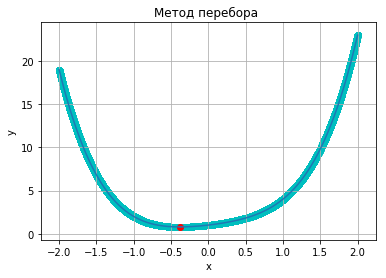

In [2]:
# Метод перебора
def brute_force_method(start, end, epsilon, show_chart):
    y_min = brute_force(func_original, start, end, epsilon, show_chart)
    name = 'Метод перебора '
    print(name, y_min)
    plt.title(name)
    
# Метод перебора
def brute_force(func, start, end, epsilon, show_chart=False):
    a = start
    b = end
    n = (b - a) / epsilon
    x = np.linspace(a, b, n)
    y = func(x)

    min_index = np.argmin(y)

    if show_chart:
        plt.scatter(x, y, color='c')

    plt.scatter(x[min_index], y[min_index], color='red')

    return y[min_index]


plot_func(start, end, brute_force_method, epsilon, True)


Поразрядный поиск  0.7851952660269428
Количество итераций  34


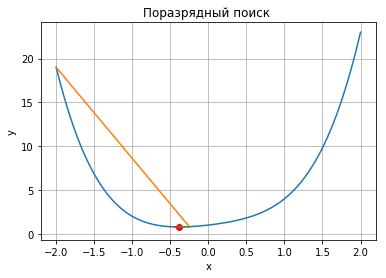

In [3]:
# Поразрядный поиск
import numpy as np
import matplotlib.pyplot as plt


# Поразрядный поиск
def bitwise(func, start, end, delta, epsilon, show_chart=False):
    x = start
    y = func(x)

    x_old = x
    y_old = y
    iter_count = 0

    mul_const = -4

    while np.abs(delta * mul_const) > epsilon:
        x, y, iter_count = on_bit(func, x, delta, y, iter_count)

        # Постройка графика
        if show_chart:
            plt.plot([x_old, x], [y_old, y])
            x_old = x
            y_old = y

        delta /= mul_const

    if show_chart:
        plt.scatter(x, y, color='red')

    return y, iter_count


def on_bit(func, x, delta, y_old, iter_count):
    x += delta
    y_new = func(x)
    iter_count += 1

    while y_new < y_old:
        y_old = y_new
        x += delta
        y_new = func(x)
        iter_count += 1

    return x, y_new, iter_count


def bitwise_method(start, end, epsilon, show_chart):
    delta = 0.25
    y_min, iter_count = bitwise(func_original, start, end, delta, epsilon, show_chart=show_chart)
    name = 'Поразрядный поиск '
    print(name, y_min)
    print('Количество итераций ', iter_count)
    plt.title(name)

plot_func(start, end, bitwise_method, epsilon, True)


Дихотомия  0.7851952544558956
Количество итераций  16


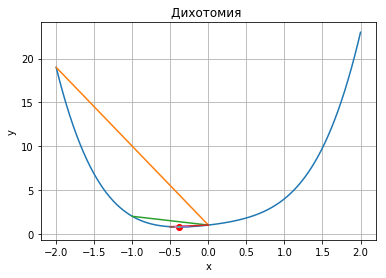

In [4]:
import matplotlib.pyplot as plt


# Дихотомия
def dihotomy(func, start, end, delta, epsilon, show_chart=False):
    a = start
    b = end

    x1 = (b + a - delta) / 2
    x2 = (b + a + delta) / 2

    y1 = func(x1)
    y2 = func(x2)

    epsilon_n = (b - a) / 2

    iter_count = 1
    while epsilon_n > epsilon:
        x1, y1, x2, y2, epsilon_n, a, b = on_dih(func, a, b, delta, x1, y1, x2, y2)
        iter_count += 1
        if show_chart:
            plt.plot([a, b], [func(a), func(b)])

    x_result = (a + b) / 2
    func_result = func(x_result)

    if show_chart:
        plt.scatter(x_result, func_result, color='red')

    return func_result, iter_count


def on_dih(func, start, end, delta, x1, y1, x2, y2):
    a = start
    b = end

    if y1 <= y2:
        b = x2
    else:
        a = x1

    epsilon_n = ((b - a) / 2)

    x1 = (b + a - delta) / 2
    x2 = (b + a + delta) / 2
    y1 = func(x1)
    y2 = func(x2)

    return x1, y1, x2, y2, epsilon_n, a, b


def dihotomy_method(start, end, epsilon, show_chart):
    name = 'Дихотомия '
    delta = 0.00005
    y_min, iter_count = dihotomy(func_original, start, end, delta, epsilon, show_chart=show_chart)
    print(name, y_min)
    print('Количество итераций ', iter_count)
    plt.title(name)

    
plot_func(start, end, dihotomy_method, epsilon, True)

Метод золотого сечения 0.7851952536154752
Количество итераций  21


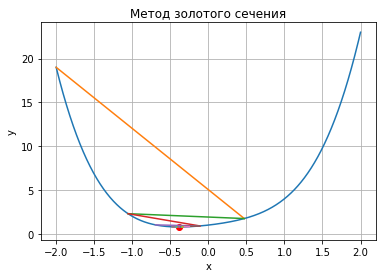

In [5]:
import numpy as np
import matplotlib.pyplot as plt


# Метод золотого сечения
def golden(func, start, end, epsilon, show_chart=False):
    a = start
    b = end

    x1 = a + ((3 - np.sqrt(5)) / 2) * (b - a)
    x2 = a + ((np.sqrt(5) - 1) / 2) * (b - a)

    y1 = func(x1)
    y2 = func(x2)

    tau = (np.sqrt(5) - 1) / 2
    epsilon_n = (b - a) / 2

    iter_count = 1
    while epsilon_n > epsilon:
        a, b, x1, y1, x2, y2, epsilon_n = on_golden(func, a, b, x1, y1, x2, y2, tau)
        iter_count += 1

        if show_chart:
            plt.plot([a, b], [func(a), func(b)])

    x_result = (a + b) / 2
    y_result = func(x_result)

    if show_chart:
        plt.scatter(x_result, y_result, color='red')

    return y_result, iter_count


def on_golden(func, start, end, x1, y1, x2, y2, tau):
    a = start
    b = end

    if y1 <= y2:
        b = x2
        x2 = x1
        y2 = y1
        x1 = b - (tau * (b - a))
        y1 = func(x1)
    else:
        a = x1
        x1 = x2
        y1 = y2
        x2 = b - ((1 - tau) * (b - a))
        y2 = func(x2)

    epsilonN = tau * ((b - a) / 2)

    return a, b, x1, y1, x2, y2, epsilonN



def golden_section_method(start, end, epsilon, show_chart):
    name = 'Метод золотого сечения'
    y_min, iter_count = golden(func_original, start, end, epsilon, show_chart=show_chart)
    print(name, y_min)
    print('Количество итераций ', iter_count)
    plt.title(name)

plot_func(start, end, golden_section_method, epsilon, True)


Метод парабол  0.7851954916814745
Количество итераций  33


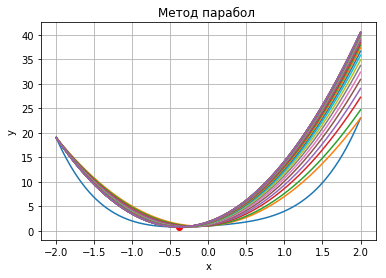

In [6]:
import numpy as np
import matplotlib.pyplot as plt


# Метод парабол
def parabole(func, start, end, epsilon, show_chart=False):
    a = start
    b = end

    x1 = a
    x2 = (a + b) / 2
    x3 = b

    f1 = func(x1)
    f2 = func(x2)
    f3 = func(x3)

    x0, x1, x2, x3, f1, f2, f3 = on_parabole(func, x1, x2, x3, f1, f2, f3, a, b, show_chart)

    iter_count = 1
    while True:
        x_iter, x1, x2, x3, f1, f2, f3 = on_parabole(func, x1, x2, x3, f1, f2, f3, a, b, show_chart)
        delta = np.abs((x0 - x_iter))
        x0 = x_iter
        if np.abs(delta <= epsilon):
            break
        iter_count += 1

    if show_chart:
        plt.scatter(x0, func(x0), color='red')

    return func(x0), iter_count


def on_parabole(func, x1, x2, x3, f1, f2, f3, a, b, show_chart):
    a0 = f1
    a1 = (f2 - f1) / (x2 - x1)
    a2 = ((f3 - f1) / (x3 - x1) - (f2 - f1) / (x2 - x1)) / (x3 - x2)

    x = (x1 + x2 - a1 / a2) / 2

    y_plot = (lambda q: a0 + a1 * (q - x1) + a2 * (q - x1) * (q - x2))
    x_plot = np.linspace(a, b, 200)
    y_p = y_plot(x_plot)

    if show_chart:
        plt.plot(x_plot, y_p)

    fx = func(x)

    if x > x2 and fx > f2:
        x3, f3 = x, fx
    elif x > x2 and fx < f2:
        x1, f1 = x2, f2
        x2, f2 = x, fx
    elif x < x2 and fx > f2:
        x1, f1 = x, fx
    elif x < x2 and fx < f2:
        x3, f3 = x2, f2
        x2, f2 = x, fx

    return x, x1, x2, x3, f1, f2, f3



def parabole_method(start, end, epsilon, show_chart):
    name = 'Метод парабол '
    y_min, iter_count = parabole(func_original, start, end, epsilon, show_chart=show_chart)
    print(name, y_min)
    print('Количество итераций ', iter_count)
    plt.title(name)

plot_func(start, end, parabole_method, epsilon, True)


In [7]:
# Центральные разности


import sympy as sp

x_sym = sp.symbols('x')


def left_network(func, x, h=0.001):
    return (func.subs(x_sym, x) - func.subs(x_sym, (x - h))) / h


def right_network(func, x, h=0.001):
    return (func.subs(x_sym, (x + h)) - func.subs(x_sym, x)) / h


def central_network(func, x, h=0.001):
    return (func.subs(x_sym, (x + h)) - func.subs(x_sym, (x - h))) / (2 * h)


def lambda_central_network(func, x, h=0.001):
    return (func(x + h) - func(x - h)) / (2 * h)


def central_network_second(func, x, h=0.001):
    return (func.subs(x_sym, (x + h)) - 2 * func.subs(x_sym, x) + func.subs(x_sym, (x - h))) / (h ** 2)


Метод средней точки  0.785195254020382
Количество итераций  16


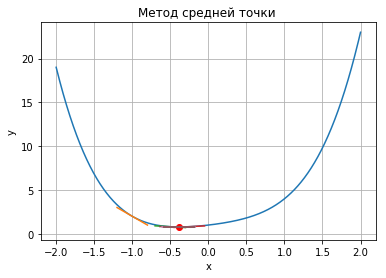

Метод средней точки, центральная разность  0.785195254020382
Количество итераций  16


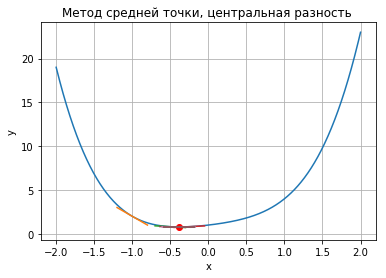

Метод средней точки, левая разность 0.785195744466804
Количество итераций  16


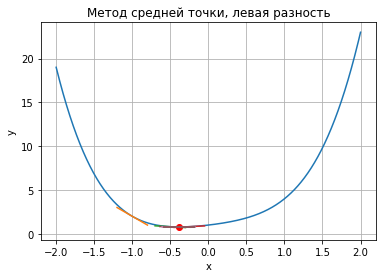

Метод средней точки, правая разность  0.785195721133647
Количество итераций  17


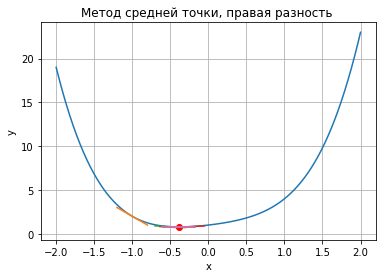

In [8]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt


x_sym = sp.symbols('x')
sym_func = x_sym ** 4 + x_sym ** 2 + x_sym + 1



def default_count(func, x, h=0):
    func_diff = sp.diff(func, x_sym)
    return func_diff.subs(x_sym, x)


# Метод средней точки
def middle_point(func, start, end, epsilon, show_chart=False, f_diff_method=default_count):
    a = start
    b = end

    left_diff = f_diff_method(func, a)
    right_diff = f_diff_method(func, b)

    if not (left_diff * right_diff < 0):
        return 'На концах в производной одинаковые знаки.'

    df, x0 = on_middle(f_diff_method, func, a, b)

    iter_count = 1
    step = 0.2
    while np.abs(df) > epsilon:
        if df > 0:
            b = x0
        else:
            a = x0

        df, x1 = on_middle(f_diff_method, func, a, b)

        if show_chart:
            x_p = np.linspace(x1 - step, x1 + step, 200)
            plt.plot(x_p, df * (x_p - x1) + func.subs(x_sym, x1))

        x0 = x1
        iter_count += 1

    if show_chart:
        plt.scatter(x0, func.subs(x_sym, x0), color='red')

    return func.subs(x_sym, x0), iter_count


def on_middle(f_diff_method, func, start, end):
    a = start
    b = end

    x_iter = (a + b) / 2
    df = f_diff_method(func, x_iter)

    return df, x_iter



def middle_point_method(start, end, epsilon, show_chart):
    name = 'Метод средней точки '
    y_min, iter_count = middle_point(sym_func, start, end, epsilon, show_chart=show_chart)
    print(name, y_min)
    print('Количество итераций ', iter_count)
    plt.title(name)


def middle_point_method_central_network(start, end, epsilon, show_chart):
    name = 'Метод средней точки, центральная разность '
    y_min, iter_count = middle_point(sym_func, start, end, epsilon, show_chart=show_chart,
                                           f_diff_method=central_network)
    print(name, y_min)
    print('Количество итераций ', iter_count)
    plt.title(name)


def middle_point_method_left_network(start, end, epsilon, show_chart):
    name = 'Метод средней точки, левая разность'
    y_min, iter_count = middle_point(sym_func, start, end, epsilon, show_chart=show_chart, f_diff_method=left_network)
    print(name, y_min)
    print('Количество итераций ', iter_count)
    plt.title(name)


def middle_point_method_right_network(start, end, epsilon, show_chart):
    name = 'Метод средней точки, правая разность '
    y_min, iter_count = middle_point(sym_func, start, end, epsilon, show_chart=show_chart,
                                           f_diff_method=right_network)
    print(name, y_min)
    print('Количество итераций ', iter_count)
    plt.title(name)


plot_func(start, end, middle_point_method, epsilon, True)
plot_func(start, end, middle_point_method_central_network, epsilon, True)
plot_func(start, end, middle_point_method_left_network, epsilon, True)
plot_func(start, end, middle_point_method_right_network, epsilon, True)


Метод хорд 0.785195254264057
Количество итераций  52


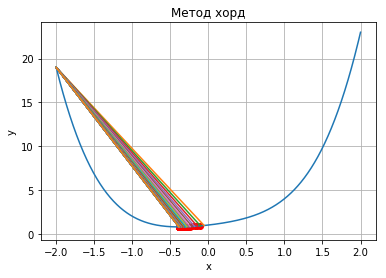

Метод хорд, центральная разность  0.785195254301831
Количество итераций  52


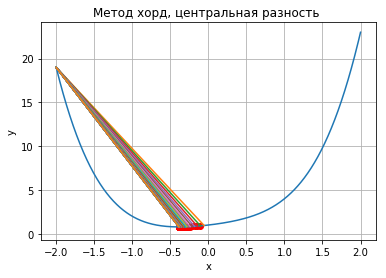

Метод хорд, левая разность  0.785195773446753
Количество итераций  52


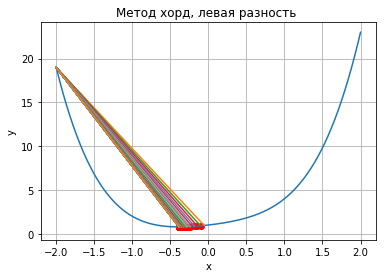

Метод хорд, правая разность  0.785195681485877
Количество итераций  52


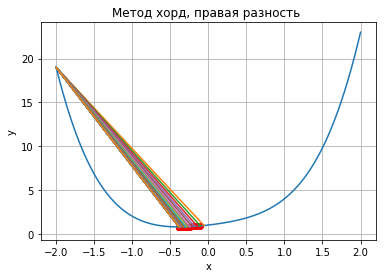

In [9]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

x_sym = sp.symbols('x')


def default_count(func, x, h=0):
    func_diff = sp.diff(func, x_sym)
    return float(func_diff.subs(x_sym, x))


#
# Метод хорд
#
def chord(func, start, end, epsilon, show_chart=False, f_diff_method=default_count):
    a = start
    b = end

    left_diff = f_diff_method(func, a)
    right_diff = f_diff_method(func, b)

    if not (left_diff * right_diff < 0):
        return 'На концах в производной одинаковые знаки'

    x0, y0 = on_chord(func, x_sym, a, b, f_diff_method)

    iter_count = 1
    while np.abs(y0) > epsilon:
        if y0 > 0:
            b = x0
        else:
            a = x0

        x_iter, y_iter = on_chord(func, x_sym, a, b, f_diff_method)
        x0 = x_iter
        y0 = y_iter
        iter_count += 1

        if show_chart:
            plt.plot([a, b], [func.subs(x_sym, a), func.subs(x_sym, b)])
            plt.scatter(x0, func.subs(x_sym, x0), color='red')

    return func.subs(x_sym, x0), iter_count


def on_chord(func, x_sym, start, end, f_diff_method):
    a = start
    b = end

    x_iter = a - (f_diff_method(func, a) * (a - b)) / (f_diff_method(func, a) - f_diff_method(func, b))

    y_iter = f_diff_method(func, x_iter)

    return float(x_iter), float(y_iter)



def chord_method(start, end, epsilon, show_chart):
    name = 'Метод хорд'
    y_min, iter_count = chord(sym_func, start, end, epsilon, show_chart=show_chart)
    print(name, y_min)
    print('Количество итераций ', iter_count)
    plt.title(name)


def chord_method_central_network(start, end, epsilon, show_chart):
    name = 'Метод хорд, центральная разность '
    y_min, iter_count = chord(sym_func, start, end, epsilon, show_chart=show_chart, f_diff_method=central_network)
    print(name, y_min)
    print('Количество итераций ', iter_count)
    plt.title(name)


def chord_method_left_network(start, end, epsilon, show_chart):
    name = 'Метод хорд, левая разность '
    y_min, iter_count = chord(sym_func, start, end, epsilon, show_chart=show_chart, f_diff_method=left_network)
    print(name, y_min)
    print('Количество итераций ', iter_count)
    plt.title(name)


def chord_method_right_network(start, end, epsilon, show_chart):
    name = 'Метод хорд, правая разность '
    y_min, iter_count = chord(sym_func, start, end, epsilon, show_chart=show_chart, f_diff_method=right_network)
    print(name, y_min)
    print('Количество итераций ', iter_count)
    plt.title(name)


plot_func(start, end, chord_method, epsilon, True)
plot_func(start, end, chord_method_central_network, epsilon, True)
plot_func(start, end, chord_method_left_network, epsilon, True)
plot_func(start, end, chord_method_right_network, epsilon, True)

Метод Ньютона  0.785195253147138
Количество итераций  6


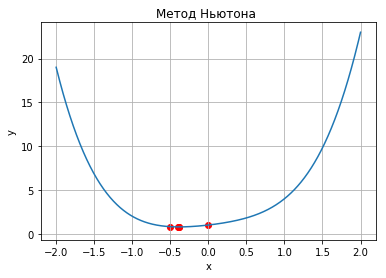

Метод Ньютона, центральная разность  0.7851952531474523
Количество итераций  6


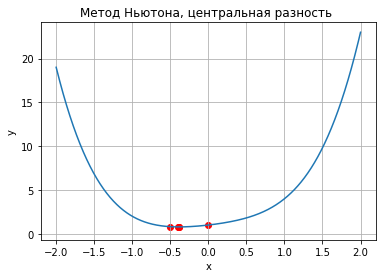

Метод Ньютона, левая разность  0.785195726013976
Количество итераций  6


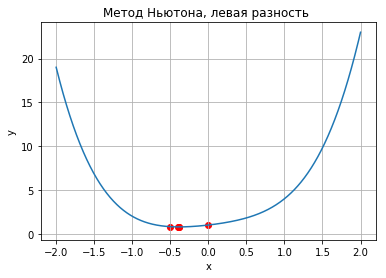

Метод Ньютона, правая разность  0.7851957260148497
Количество итераций  6


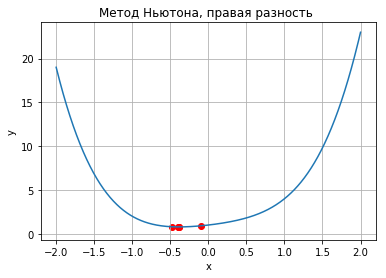

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

x_sym = sp.symbols('x')


def default_count(func, x, h=0):
    func_diff = sp.diff(func, x_sym)
    return float(func_diff.subs(x_sym, x))


def default_count_second_der(func, x, h=0):
    func_diff = sp.diff(func, x_sym)
    f_diff_diff = sp.diff(func_diff, x_sym)
    return float(f_diff_diff.subs(x_sym, x))


#
# Метод Ньютона
#
def newton(func, start, end, epsilon, show_chart=False, f_diff_method=default_count, f_diff_diff_method=default_count_second_der, x_start=0):
    a = start
    b = end

    left_diff = f_diff_method(func, a)
    right_diff = f_diff_method(func, b)
    if not (left_diff * right_diff < 0):
        return 'На концах в производной одинаковые знаки'

    x0 = x_start
    df = 1
    df_old = df

    iter_count = 1
    while np.abs(df) > epsilon:

        if show_chart:
            plt.scatter(x0, func.subs(x_sym, x0), color='red')

        dff = float(f_diff_diff_method(func, x0))
        df = float(f_diff_method(func, x0))
        x0 -= float(df) / float(dff)

        if iter_count > 0 and np.abs(df) > df_old:
            error = 'Метод не сошёлся.'
            return error, 0

        df_old = np.abs(df)

        iter_count += 1

    return float(func.subs(x_sym, x0)), iter_count


def rafson_mod(func, start, end, epsilon, show_chart=False, f_diff_method=default_count, f_diff_diff_method=default_count_second_der, x_start=0):
    a = start
    b = end

    left_diff = f_diff_method(func, a)
    right_diff = f_diff_method(func, b)
    if not (left_diff * right_diff < 0):
        return 'На концах в производной одинаковые знаки'

    x0 = x_start
    df = 1
    df_old = df

    iter_count = 1
    while np.abs(df) > epsilon:

        if show_chart:
            plt.scatter(x0, func.subs(x_sym, x0), color='red')

        dff = float(f_diff_diff_method(func, x0))
        df = float(f_diff_method(func, x0))
        t = df ** 2 / (df ** 2 + f_diff_method(func, (x0 - float(df) / float(dff))))
        x0 -= t * float(df) / float(dff)

        if iter_count > 0 and np.abs(df) > df_old:
            error = 'Метод не сошёлся.'
            return error, 0

        df_old = np.abs(df)
        iter_count += 1

    return float(func.subs(x_sym, x0)), iter_count


def markvardt_mod(func, start, end, epsilon, show_chart=False, f_diff_method=default_count, f_diff_diff_method=default_count_second_der, x_start=0):
    a = start
    b = end

    left_diff = f_diff_method(func, a)
    right_diff = f_diff_method(func, b)
    if not (left_diff * right_diff < 0):
        return 'На концах в производной одинаковые знаки'

    x0 = x_start
    df = 1

    mu = 10 * float(f_diff_diff_method(func, x0))
    iter_count = 1
    old_iter_count = iter_count

    while np.abs(df) > epsilon:
        df_old = np.abs(df)
        if show_chart:
            plt.scatter(x0, func.subs(x_sym, x0), color='red')

        old_x = x0

        dff = float(f_diff_diff_method(func, old_x))
        df = float(f_diff_method(func, old_x))

        delta = float(df) / (float(dff) + float(mu))
        x0 = old_x - delta

        Эта проверка не работает, хотя взята с учебника.
        if func.subs(x_sym, x0) < func.subs(x_sym, old_x):
            mu /= 2
            iter_count += 1
        else:
            mu *= 2

        # if delta > 0:
        #     mu /= 2
        # else:
        #     mu *= 2

        if iter_count > 0 and np.abs(df) >= df_old:
            error = 'Метод не сошёлся.'
            return error, 0


    return float(func.subs(x_sym, x0)), iter_count



def newton_method(start, end, epsilon, show_chart, x_start=0):
    name = 'Метод Ньютона '
    y_min, iter_count = newton(sym_func, start, end, epsilon, show_chart=show_chart, x_start=x_start)
    print(name, y_min)
    print('Количество итераций ', iter_count)
    plt.title(name)


def newton_method_central_network(start, end, epsilon, show_chart):
    name = 'Метод Ньютона, центральная разность '
    y_min, iter_count = \
        newton(
            sym_func,
            start,
            end,
            epsilon,
            show_chart=show_chart,
            f_diff_method=central_network,
            f_diff_diff_method=central_network_second)
    print(name, y_min)
    print('Количество итераций ', iter_count)
    plt.title(name)


def newton_method_left_network(start, end, epsilon, show_chart):
    name = 'Метод Ньютона, левая разность '
    y_min, iter_count = \
        newton(
            sym_func,
            start,
            end,
            epsilon,
            show_chart=show_chart,
            f_diff_method=left_network,
            f_diff_diff_method=central_network_second)
    print(name, y_min)
    print('Количество итераций ', iter_count)
    plt.title(name)


def newton_method_right_network(start, end, epsilon, show_chart):
    name = 'Метод Ньютона, правая разность '
    y_min, iter_count = \
        newton(
            sym_func,
            start,
            end,
            epsilon,
            show_chart=show_chart,
            f_diff_method=right_network,
            f_diff_diff_method=central_network_second,
            x_start=-0.1)
    print(name, y_min)
    print('Количество итераций ', iter_count)
    plt.title(name)


plot_func(start, end, newton_method, epsilon, True)
plot_func(start, end, newton_method_central_network, epsilon, True)
plot_func(start, end, newton_method_left_network, epsilon, True)
plot_func(start, end, newton_method_right_network, epsilon, True)

In [11]:
# Метод Ньютона без модификаций.

import matplotlib.pyplot as plt
import sympy as sp
import numpy as np


x_sym = sp.symbols('x')
func = lambda x: (x * np.arctan(x) - np.log(1 + (x ** 2)) / 2)
arctg_func = x_sym * sp.atan(x_sym) - sp.log(1 + (x_sym ** 2)) / 2


# Построить график функции
def plot_newton_func(start, end, method, x_start, epsilon=0.1):
    plt.figure()
    plt.ion()

    cuts = 1000
    x_arr = np.linspace(start, end, cuts)

    plt.plot(x_arr, func(x_arr))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    method(start, end, epsilon, x_start=x_start)
    plt.draw()
    plt.pause(0.01)
    plt.show()


def newton_method_atan(start, end, epsilon, x_start):
    name = 'Метод Ньютона для 4 задания.'

    y_min, iter_count = newton(arctg_func, start, end, epsilon, x_start=x_start)

    print(name, y_min)
    print('Количество итераций ', iter_count)


def newton_method_atan_central_network(start, end, epsilon, x_start):
    name = 'Метод Ньютона для 4 задания, средняя разность.'

    y_min, iter_count = \
        newton(
            arctg_func,
            start,
            end,
            epsilon,
            f_diff_method=central_network,
            f_diff_diff_method=central_network_second,
            x_start=x_start)

    print(name, y_min)
    print('Количество итераций ', iter_count)


def newton_method_atan_left_network(start, end, epsilon, x_start):
    name = 'Метод Ньютона для 4 задания. Левая разность.'

    y_min, iter_count = \
        newton(
            arctg_func,
            start,
            end,
            epsilon,
            f_diff_method=left_network,
            f_diff_diff_method=central_network_second,
            x_start=x_start)

    print(name, y_min)
    print('Количество итераций ', iter_count)


def newton_method_atan_right_network(start, end, epsilon, x_start):
    name = 'Метод Ньютона для 4 задания. Правая разность.'

    y_min, iter_count = \
        newton(
            arctg_func,
            start,
            end,
            epsilon,
            f_diff_method=right_network,
            f_diff_diff_method=central_network_second,
            x_start=x_start)

    print(name, y_min)
    print('Количество итераций ', iter_count)


def find_range_numerically(start, end, epsilon):
    x_arr = np.arange(start, end, 0.01)

    min_a = end
    min_b = start

    timer_emu = 0
    for point in x_arr:
        y_min, iter_count = newton(arctg_func, start, end, epsilon, x_start=point, show_chart=True)
        if iter_count > 0:
            if point < min_a:
                min_a = point
            if point > min_b:
                min_b = point
#         if timer_emu % 5 is 0:
#             print('Счёт идёт, никто не заглох...', timer_emu)
#         timer_emu += 1

    print('Диапазон начальных значений: [', min_a, ',', min_b, ']')

    return min_a, min_b


Диапазон начальных значений: [ -1.3899999999999995 , 1.3900000000000032 ]


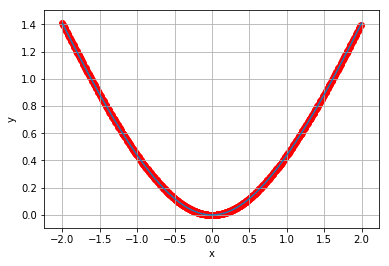

In [12]:
func_atan = lambda x: x * np.arctan(x) - np.log(1 + (x ** 2)) / 2


import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

x_sym = sp.symbols('x')


def default_count(func, x, h=0):
    func_diff = sp.diff(func, x_sym)
    return float(func_diff.subs(x_sym, x))


def default_count_second_der(func, x, h=0):
    func_diff = sp.diff(func, x_sym)
    f_diff_diff = sp.diff(func_diff, x_sym)
    return float(f_diff_diff.subs(x_sym, x))


# Диапазон для обычного Ньютона.

plt.figure()
plt.ion()

cuts = 1000
x_arr = np.linspace(start, end, cuts)

plt.plot(x_arr, func_atan(x_arr))
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
a, b = find_range_numerically(start, end, epsilon)
plt.draw()
plt.pause(0.01)
plt.show()

In [13]:
 #Сходимость и расходимость
    
newton_method_atan(start, end, epsilon, a + 0.01)
newton_method_atan(start, end, epsilon, a - 0.01)
newton_method_atan(start, end, epsilon, b + 0.01)
newton_method_atan(start, end, epsilon, b - 0.01)

newton_method_atan_central_network(start, end, epsilon, a + 0.01)
newton_method_atan_central_network(start, end, epsilon, a - 0.01)
newton_method_atan_central_network(start, end, epsilon, b + 0.01)
newton_method_atan_central_network(start, end, epsilon, b - 0.01)

newton_method_atan_left_network(start, end, epsilon, a + 0.01)
newton_method_atan_left_network(start, end, epsilon, a - 0.01)
newton_method_atan_left_network(start, end, epsilon, b + 0.01)
newton_method_atan_left_network(start, end, epsilon, b - 0.01)

newton_method_atan_right_network(start, end, epsilon, a + 0.01)
newton_method_atan_right_network(start, end, epsilon, a - 0.01)
newton_method_atan_right_network(start, end, epsilon, b + 0.01)
newton_method_atan_right_network(start, end, epsilon, b - 0.01)

Метод Ньютона для 4 задания. 0.0
Количество итераций  10
Метод Ньютона для 4 задания. Метод не сошёлся.
Количество итераций  0
Метод Ньютона для 4 задания. Метод не сошёлся.
Количество итераций  0
Метод Ньютона для 4 задания. 0.0
Количество итераций  10
Метод Ньютона для 4 задания, средняя разность. 1.483595545787954e-28
Количество итераций  10
Метод Ньютона для 4 задания, средняя разность. Метод не сошёлся.
Количество итераций  0
Метод Ньютона для 4 задания, средняя разность. Метод не сошёлся.
Количество итераций  0
Метод Ньютона для 4 задания, средняя разность. 6.333039835843668e-29
Количество итераций  10
Метод Ньютона для 4 задания. Левая разность. 1.249999947500303e-07
Количество итераций  10
Метод Ньютона для 4 задания. Левая разность. Метод не сошёлся.
Количество итераций  0
Метод Ньютона для 4 задания. Левая разность. Метод не сошёлся.
Количество итераций  0
Метод Ньютона для 4 задания. Левая разность. 1.2499999470586035e-07
Количество итераций  10
Метод Ньютона для 4 задания. 

Диапазон начальных значений: [ -1.5499999999999996 , 0.5400000000000023 ]


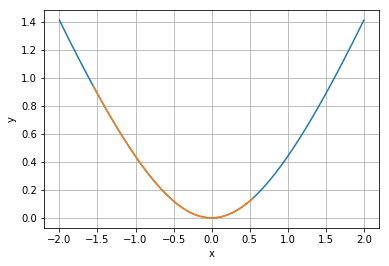

Метод Рафсона для 4 задания. 1.762733645984516e-24
Количество итераций  4
Метод Рафсона для 4 задания. Метод не сошёлся.
Количество итераций  0
Метод Рафсона для 4 задания. Метод не сошёлся.
Количество итераций  0
Метод Рафсона для 4 задания. 8.250790113894952e-27
Количество итераций  6
Метод Рафсона для 4 задания, средняя разность. 1.484068478731885e-14
Количество итераций  5
Метод Рафсона для 4 задания, средняя разность. Метод не сошёлся.
Количество итераций  0
Метод Рафсона для 4 задания, средняя разность. Метод не сошёлся.
Количество итераций  0
Метод Рафсона для 4 задания, средняя разность. 4.001135084643889e-13
Количество итераций  6
Метод Рафсона для 4 задания. Левая разность. 1.248594434498032e-07
Количество итераций  4
Метод Рафсона для 4 задания. Левая разность. Метод не сошёлся.
Количество итераций  0
Метод Рафсона для 4 задания. Левая разность. Метод не сошёлся.
Количество итераций  0
Метод Рафсона для 4 задания. Левая разность. 1.2502492389050758e-07
Количество итераций  6

In [14]:
# Метод Рафсона
import matplotlib.pyplot as plt
import sympy as sp
import numpy as np


x_sym = sp.symbols('x')
func = lambda x: (x * np.arctan(x) - np.log(1 + (x ** 2)) / 2)
arctg_func = x_sym * sp.atan(x_sym) - sp.log(1 + (x_sym ** 2)) / 2


# Построить график функции
def plot_newton_func(start, end, method, x_start, epsilon=0.1):
    plt.figure()
    plt.ion()

    cuts = 1000
    x_arr = np.linspace(start, end, cuts)

    plt.plot(x_arr, func(x_arr))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    method(start, end, epsilon, x_start=x_start)
    plt.draw()
    plt.pause(0.01)
    plt.show()


def newton_method_atan(start, end, epsilon, x_start):
    name = 'Метод Рафсона для 4 задания.'

    y_min, iter_count = rafson_mod(arctg_func, start, end, epsilon, x_start=x_start)

    print(name, y_min)
    print('Количество итераций ', iter_count)


def newton_method_atan_central_network(start, end, epsilon, x_start):
    name = 'Метод Рафсона для 4 задания, средняя разность.'

    y_min, iter_count = \
        rafson_mod(
            arctg_func,
            start,
            end,
            epsilon,
            f_diff_method=central_network,
            f_diff_diff_method=central_network_second,
            x_start=x_start)

    print(name, y_min)
    print('Количество итераций ', iter_count)


def newton_method_atan_left_network(start, end, epsilon, x_start):
    name = 'Метод Рафсона для 4 задания. Левая разность.'

    y_min, iter_count = \
        rafson_mod(
            arctg_func,
            start,
            end,
            epsilon,
            f_diff_method=left_network,
            f_diff_diff_method=central_network_second,
            x_start=x_start)

    print(name, y_min)
    print('Количество итераций ', iter_count)


def newton_method_atan_right_network(start, end, epsilon, x_start):
    name = 'Метод Рафсона для 4 задания. Правая разность.'

    y_min, iter_count = \
        rafson_mod(
            arctg_func,
            start,
            end,
            epsilon,
            f_diff_method=right_network,
            f_diff_diff_method=central_network_second,
            x_start=x_start)

    print(name, y_min)
    print('Количество итераций ', iter_count)


def find_range_numerically(start, end, epsilon):
    x_arr = np.arange(start, end, 0.01)

    min_a = end
    min_b = start

    timer_emu = 0
    for point in x_arr:
        y_min, iter_count = rafson_mod(arctg_func, start, end, epsilon, x_start=point, show_chart=False)
        if iter_count > 0:
            if point < min_a:
                min_a = point
            if point > min_b:
                min_b = point
#         if timer_emu % 5 is 0:
#             print('Счёт идёт, никто не заглох...', timer_emu)
#         timer_emu += 1

    x_arr = np.arange(min_a, min_b, 0.01)
    plt.plot(x_arr, func(x_arr))

    print('Диапазон начальных значений: [', min_a, ',', min_b, ']')

    return min_a, min_b


plt.figure()
plt.ion()

cuts = 1000
x_arr = np.linspace(start, end, cuts)

plt.plot(x_arr, func_atan(x_arr))
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
a, b = find_range_numerically(start, end, epsilon)
plt.draw()
plt.pause(0.01)
plt.show()

newton_method_atan(start, end, epsilon, a + 0.1)
newton_method_atan(start, end, epsilon, a - 0.1)
newton_method_atan(start, end, epsilon, b + 0.1)
newton_method_atan(start, end, epsilon, b - 0.1)

newton_method_atan_central_network(start, end, epsilon, a + 0.01)
newton_method_atan_central_network(start, end, epsilon, a - 0.1)
newton_method_atan_central_network(start, end, epsilon, b + 0.1)
newton_method_atan_central_network(start, end, epsilon, b - 0.1)

newton_method_atan_left_network(start, end, epsilon, a + 0.1)
newton_method_atan_left_network(start, end, epsilon, a - 0.1)
newton_method_atan_left_network(start, end, epsilon, b + 0.1)
newton_method_atan_left_network(start, end, epsilon, b - 0.1)

newton_method_atan_right_network(start, end, epsilon, a + 0.1)
newton_method_atan_right_network(start, end, epsilon, a - 0.1)
newton_method_atan_right_network(start, end, epsilon, b + 0.1)
newton_method_atan_right_network(start, end, epsilon, b - 0.1)

Диапазон начальных значений: [ 1.7763568394002505e-15 , 1.5500000000000034 ]


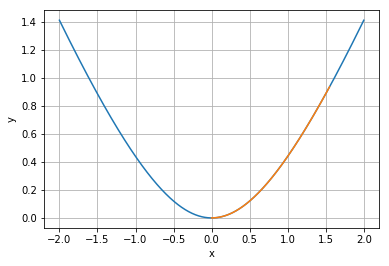

Метод Марквардта для 4 задания. 4.635152838457785e-13
Количество итераций  1
Метод Марквардта для 4 задания. Метод не сошёлся.
Количество итераций  0
Метод Марквардта для 4 задания. Метод не сошёлся.
Количество итераций  0
Метод Марквардта для 4 задания. 1.0192403230822052e-12
Количество итераций  1
Метод Марквардта для 4 задания, средняя разность. 3.630708388000451e-12
Количество итераций  1
Метод Марквардта для 4 задания, средняя разность. Метод не сошёлся.
Количество итераций  0
Метод Марквардта для 4 задания, средняя разность. Метод не сошёлся.
Количество итераций  0
Метод Марквардта для 4 задания, средняя разность. 1.01929906753451e-12
Количество итераций  1
Метод Марквардта для 4 задания. Левая разность. 1.2547940055338105e-07
Количество итераций  1
Метод Марквардта для 4 задания. Левая разность. Метод не сошёлся.
Количество итераций  0
Метод Марквардта для 4 задания. Левая разность. Метод не сошёлся.
Количество итераций  0
Метод Марквардта для 4 задания. Левая разность. 1.257137

In [15]:
import matplotlib.pyplot as plt
import sympy as sp
import numpy as np


x_sym = sp.symbols('x')
func = lambda x: (x * np.arctan(x) - np.log(1 + (x ** 2)) / 2)
arctg_func = x_sym * sp.atan(x_sym) - sp.log(1 + (x_sym ** 2)) / 2


# Построить график функции
def plot_newton_func(start, end, method, x_start, epsilon=0.1):
    plt.figure()
    plt.ion()

    cuts = 1000
    x_arr = np.linspace(start, end, cuts)

    plt.plot(x_arr, func(x_arr))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    method(start, end, epsilon, x_start=x_start)
    plt.draw()
    plt.pause(0.01)
    plt.show()


def newton_method_atan(start, end, epsilon, x_start):
    name = 'Метод Марквардта для 4 задания.'

    y_min, iter_count = markvardt_mod(arctg_func, start, end, epsilon, x_start=x_start)

    print(name, y_min)
    print('Количество итераций ', iter_count)


def newton_method_atan_central_network(start, end, epsilon, x_start):
    name = 'Метод Марквардта для 4 задания, средняя разность.'

    y_min, iter_count = \
        markvardt_mod(
            arctg_func,
            start,
            end,
            epsilon,
            f_diff_method=central_network,
            f_diff_diff_method=central_network_second,
            x_start=x_start)

    print(name, y_min)
    print('Количество итераций ', iter_count)


def newton_method_atan_left_network(start, end, epsilon, x_start):
    name = 'Метод Марквардта для 4 задания. Левая разность.'

    y_min, iter_count = \
        markvardt_mod(
            arctg_func,
            start,
            end,
            epsilon,
            f_diff_method=left_network,
            f_diff_diff_method=central_network_second,
            x_start=x_start)

    print(name, y_min)
    print('Количество итераций ', iter_count)


def newton_method_atan_right_network(start, end, epsilon, x_start):
    name = 'Метод Марквардта для 4 задания. Правая разность.'

    y_min, iter_count = \
        markvardt_mod(
            arctg_func,
            start,
            end,
            epsilon,
            f_diff_method=right_network,
            f_diff_diff_method=central_network_second,
            x_start=x_start)

    print(name, y_min)
    print('Количество итераций ', iter_count)


def find_range_numerically(start, end, epsilon):
    x_arr = np.arange(start, end, 0.01)

    min_a = end
    min_b = start

    timer_emu = 0
    for point in x_arr:
        y_min, iter_count = markvardt_mod(arctg_func, start, end, epsilon, x_start=point)
        if iter_count > 0:
            if point < min_a:
                min_a = point
            if point > min_b:
                min_b = point
#         if timer_emu % 5 is 0:
#             print('Счёт идёт, никто не заглох...', timer_emu)
#         timer_emu += 1

    x_arr = np.arange(min_a, min_b, 0.01)
    plt.plot(x_arr, func(x_arr))
    print('Диапазон начальных значений: [', min_a, ',', min_b, ']')

    return min_a, min_b



plt.figure()
plt.ion()

cuts = 1000
x_arr = np.linspace(start, end, cuts)

plt.plot(x_arr, func_atan(x_arr))
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
a, b = find_range_numerically(start, end, epsilon)
plt.draw()
plt.pause(0.01)
plt.show()

    #
newton_method_atan(start, end, epsilon, a + 0.1)
newton_method_atan(start, end, epsilon, a - 0.1)
newton_method_atan(start, end, epsilon, b + 0.1)
newton_method_atan(start, end, epsilon, b - 0.1)

newton_method_atan_central_network(start, end, epsilon, a + 0.01)
newton_method_atan_central_network(start, end, epsilon, a - 0.1)
newton_method_atan_central_network(start, end, epsilon, b + 0.1)
newton_method_atan_central_network(start, end, epsilon, b - 0.1)

newton_method_atan_left_network(start, end, epsilon, a + 0.1)
newton_method_atan_left_network(start, end, epsilon, a - 0.1)
newton_method_atan_left_network(start, end, epsilon, b + 0.1)
newton_method_atan_left_network(start, end, epsilon, b - 0.1)

newton_method_atan_right_network(start, end, epsilon, a + 0.1)
newton_method_atan_right_network(start, end, epsilon, a - 0.1)
newton_method_atan_right_network(start, end, epsilon, b + 0.1)
newton_method_atan_right_network(start, end, epsilon, b - 0.1)

/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  del sys.path[0]


Метод перебора для косинуса.  -1.882346498230896


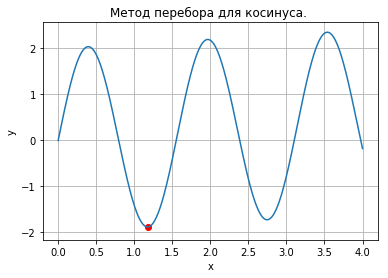

Метод ломанных для косинуса [-1.88234653]


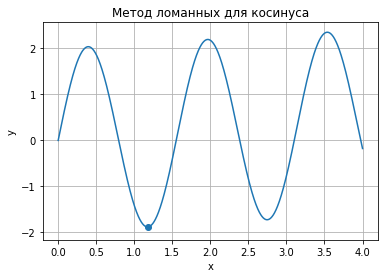

In [16]:
sin_func = lambda x: (x / 10) + (2 * np.sin(4 * x))


import numpy as np
import sympy as sp
from scipy.optimize import minimize
import matplotlib.pyplot as plt

x_sym = sp.symbols('x')


def brokens(func, start, end, epsilon, show_chart=False):
    a = start
    b = end

    f_a = func(a)
    f_b = func(b)

    L = -minimize(lambda x: -np.abs(lambda_central_network(func, x)), a, tol=10**(-5)).fun

    x_0 = (f_a - f_b + L * (a + b)) / (2 * L)

    y_0 = (f_a + f_b + L * (a - b)) / 2

    pair = []
    pair.append((x_0, y_0))

    delta = (func(x_0) - y_0) / (2 * L)

    iter_count = 1
    while not 2 * L * delta < epsilon:
        delta, pair, x_0 = on_brokens(func, pair, L)
        iter_count += 1

    y_min = func(x_0)
    plt.scatter(x_0, y_min)

    return y_min


def on_brokens(func, pair, L):
    x_0, p_0 = pair[0]

    for (x, p) in pair[1:]:
        if p < p_0:
            x_0, p_0 = x, p

    f_x0 = func(x_0)
    delta = (f_x0 - p_0) / L / 2

    x_1 = x_0 - delta
    x_2 = x_0 + delta
    p = (f_x0 + p_0) / 2

    pair.append((x_1, p))
    pair.append((x_2, p))
    pair.remove((x_0, p_0))

    return delta, pair, x_0


def brute_force_sin(start, end, epsilon, show_chart):
    name = 'Метод перебора для косинуса. '
    y_min = \
        brute_force(
            sin_func,
            start,
            end,
            epsilon,
            show_chart)
    print(name, y_min)
    plt.title(name)


    
def brokens_method_sin(start, end, epsilon, show_chart):
    name = 'Метод ломанных для косинуса'
    y_min = brokens(sin_func, start, end, epsilon, show_chart=show_chart)
    print(name, y_min)
    plt.title(name)
    
    
start = 0
end = 4
plot_func(start, end, brute_force_sin, epsilon, func=sin_func)
plot_func(start, end, brokens_method_sin, epsilon, func=sin_func)

/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  del sys.path[0]


Метод перебора для косинуса.  -0.12832492848502247


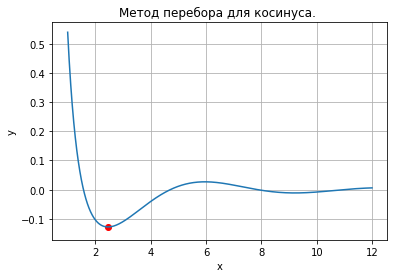

Метод ломанных для косинуса [-0.12832493]


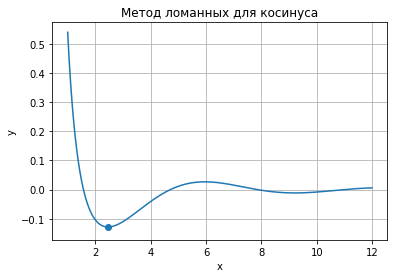

In [17]:
cos_func = lambda x: (np.cos(x) / (x ** 2))


def brute_force_cos(start, end, epsilon, show_chart):
    name = 'Метод перебора для косинуса. '
    y_min = \
        brute_force(
            cos_func,
            start,
            end,
            epsilon,
            show_chart)
    print(name, y_min)
    plt.title(name)


def brokens_method_cos(start, end, epsilon, show_chart):
    name = 'Метод ломанных для косинуса'
    y_min = brokens(cos_func, start, end, epsilon, show_chart=show_chart)
    print(name, y_min)
    plt.title(name)


start = 1
end = 12
plot_func(start, end, brute_force_cos, epsilon, func=cos_func)
plot_func(start, end, brokens_method_cos, epsilon, func=cos_func)